In [5]:
#Load the data, rename columns
import math
import pandas as pd

filepath = "./Data miners 2022 (answers).csv"
df = pd.read_csv(filepath)
df.set_axis(['Time', 'Hoping','Topics','Which programme','Why course', 'First language','How long', 'Python skills', 'Math formulars', 'Shoe size', 'Height','gender'], axis='columns', inplace=True)

In [21]:
#kmeans algorithm

def initializeMeans(df, clusters):
    #Intialize the means by randomly taking 'clusters amount' points from the dataframe.

    means = df.sample(clusters)
    for i in range(len(means)):
        means.iat[i, 2] = i
    
    return means

def euclideanDist(df,pointIDX,means):
    #Takes the index of a point and calculate the distance to each mean. Stores the class with the lowest distance to
    #the point in a variable 'cla'. Changes the points class to 'cla'. Also stores the distance in the column 'distance'
    point = df.iloc[[pointIDX]].squeeze()
    p1, p2, c1, d1 = point
    lowest = float('inf') #Set the lowest distance to positive infinity
    cla = 0
    
    for i in range(len(means)):
        q1, q2, c2, d1 = means.iloc[i]
        distance = math.sqrt(((q1-p1)**2) + ((q2-p2))**2)
        if(distance<lowest):
            lowest = distance
            cla = c2
    df.iat[pointIDX, 2] = cla
    df.iat[pointIDX, 3] = lowest
    
    return df

def updateMean(df, clusters):
    #return 'clusters amount' new means in a dataframe. Terrible code
    means = df.loc[df['class']==clusters-1].mean().to_frame().transpose() #Initialize a dataframe with the correct columns

    for i in range(clusters-1): 
        mean = df.loc[df['class']==i].mean().to_frame().transpose()
        means = pd.concat([means,mean]) #merge with the means variable.Note goes to -1 since the means already has that mean.

    print(means)
    return means


def Kmeans(df,iterations, clusters):
    #From the template, with some modifications to fit the above changes. Return two dataframes: means and df with updated classes.  
    #Also returns the meanDistance to make the Cluster vs mean distance plot. 
    means = initializeMeans(df, clusters)

    for iteration in range(iterations): 
        
        for i in range(len(df)):
            df = euclideanDist(df,i,means)
            
        means = updateMean(df, clusters)
    
    meanDistance = df['distance'].mean()
    
    return df,means, meanDistance


ValueError: too many values to unpack (expected 4)

Text(0, 0.5, 'Inches')

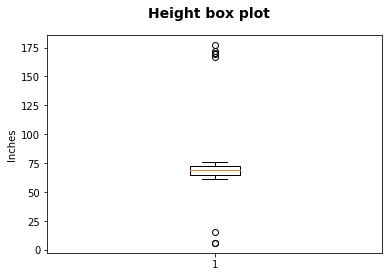

In [7]:
import matplotlib.pyplot as plt
#select the columns to be clusted
dfk = df[['Height','Shoe size']].copy()
#Remove the big outliers (7000 and 1)
dfk.drop(dfk.index[dfk['Shoe size']<10], inplace = True)
dfk.drop(dfk.index[dfk['Height']>400], inplace = True)
#Make a boxplot 
fig = plt.figure()
fig.suptitle('Height box plot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(dfk['Height'])
ax.set_ylabel('Inches')

In [8]:
dfk = dfk.reset_index(drop=True) # Remove the index from the file
dfk['class'] = 1 #Assign all points to class 1
dfk['distance'] = 0 #also create a distance column. 


In [9]:
dfkk, means, meanDistance = Kmeans(dfk,5,3) # Run the function 

In [10]:
#The mean distance elbow-point plot was made by running the kmeans method with different amount of clusters.
#For 3 clusters the meanDistance was 4.469
meanDistance

4.962447317728735

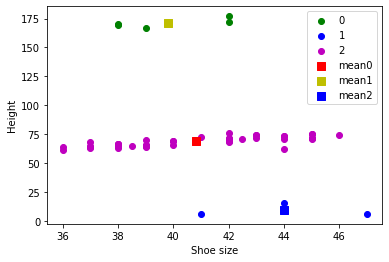

In [11]:

plt.clf()
#Scatter each point with a color corresponding to the class
plt.scatter(dfkk.loc[dfkk['class'] == 0]['Shoe size'],dfkk.loc[dfkk['class'] == 0]['Height'],color='g',label='0')  
plt.scatter(dfkk.loc[dfkk['class'] == 1]['Shoe size'],dfkk.loc[dfkk['class'] == 1]['Height'],color='b',label='1')  
plt.scatter(dfkk.loc[dfkk['class'] == 2]['Shoe size'],dfkk.loc[dfkk['class'] == 2]['Height'],color='m',label='2')
#Scatter each mean
plt.scatter(means.iloc[0].loc['Shoe size'],means.iloc[0].loc['Height'],s=70,label='mean0',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(means.iloc[1].loc['Shoe size'],means.iloc[1].loc['Height'],s=70,label='mean1',marker='s',color='y')
plt.scatter(means.iloc[2].loc['Shoe size'],means.iloc[2].loc['Height'],s=70,label='mean2',marker='s',color='b')
#Label stuff
plt.xlabel('Shoe size')
plt.ylabel('Height')
plt.legend()
plt.show()

In [12]:
#Clean the data
for i, j in dfk[['Height']].iterrows():
    val = j.iloc[0]
    if val > 130:
        dfk.at[i,'Height'] = val/2.54 #Converting centimeters to inches
    elif val < 9:
        dfk.at[i,'Height'] = val*12 #Converting feet to inches 

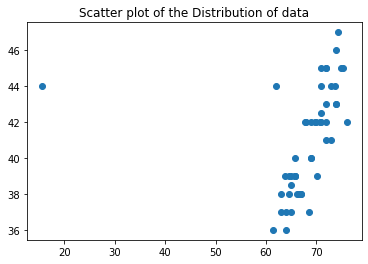

In [13]:
plt.clf()
plt.title('Scatter plot of the Distribution of data')
plt.scatter(dfk['Height'],dfk['Shoe size']) 
#Which shows there is still a single outlier that has to be removed.  


Text(0, 0.5, 'Inches')

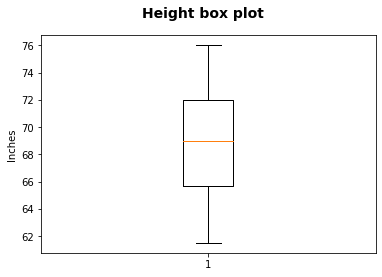

In [14]:
dfk.drop(dfk.index[dfk['Height']<20], inplace = True)
#Simply remove it as it doesnt contain any valuable data for the next analysis. 

figa = plt.figure()
figa.suptitle('Height box plot', fontsize=14, fontweight='bold')
ax = figa.add_subplot(111)
ax.boxplot(dfk['Height'])
ax.set_ylabel('Inches')

Text(0, 0.5, 'Height')

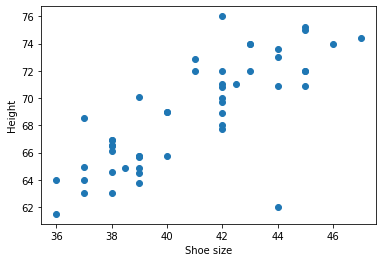

In [15]:
plt.clf()
plt.scatter(dfk['Shoe size'],dfk['Height'])
plt.xlabel('Shoe size')
plt.ylabel('Height')


In [16]:
#Now comes the linear part!

#calculate beta1 and beta0 by looping through each row in the dataframe.Returns beta1 and beta0

def linearModel(df):
    a = 0 #sum xi,yi
    b = 0 #sum af xi
    c = 0 #sum af yi
    d = 0 #sum af xi**2
    n = len(df.index)
    for index, row in df.iterrows():
        yi, xi = row
        a += xi*yi
        b += xi
        c += yi
        d += xi ** 2
    beta1 = (a-((1/n)*(b*c)))/(d-(1/n)*(b ** 2))
    beta0 = (c/n) - beta1 * (b/n)
    return beta1,beta0

#Make the linear prediction. Makes a column with predicted values. Also returns beta1 and beta0. 
def linearPrediction(df):
    b1, b0 = linearModel(df)
    df['pred'] = 0 #Makes a column and fills with zeroes. The column gets the predicted value. 
    for index, row in df.iterrows():
        a,b,c = row
        df.iat[index,2] = b*b1+b0
    return (b1,b0) #Also returns beta1 and beta0. No need to return a data frame as it has been changed. 

#predict method which returns a predicted value
def predict(x, model):
    b1,b0 = model
    return x*b1+b0




In [17]:
#Remove class and mean distance from the dataframe. 
lindf = dfk[['Height','Shoe size']]
#Reset index
lindf = lindf.reset_index(drop=True)

#Make the model
model = linearPrediction(lindf)
print(model)

(1.0620758367032963, 25.375200210010256)


<function matplotlib.pyplot.show(close=None, block=None)>

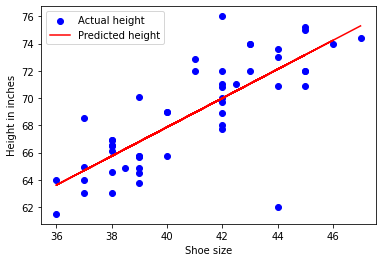

In [18]:
plt.clf()
plt.scatter(lindf['Shoe size'], lindf['Height'], color='b',label='Actual height')
plt.plot(lindf['Shoe size'], lindf['pred'], color='r', label='Predicted height')
plt.xlabel('Shoe size')
plt.ylabel('Height in inches')
plt.legend()
plt.show


In [19]:
import numpy as np
#r2 value. Using numpy to calculate standard deviation
b1, b0 = model
r2 = (b1 / (np.std(lindf['Height'])/np.std(lindf['Shoe size'])))**2

r2

0.6122929267138316

In [20]:
predict(46,model) #Almost predicted my height

74.23068869836189